# Project: Investigate a Dataset - [no_show_dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil. In this dataset we will try to find out the reasons beyond why some patients not showing up on their appointment date scheduled.


### Question(s) for Analysis
* 1- does Gender has effect on show/no_show ???
* 2- does Age has effect on show/no_show ???
* 3- does having schorlarship affects show/no_show ???

In [27]:
#let's import important libararies:-)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 

In [28]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [29]:
# Let's load our dateset
df= pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [30]:
#Let's see how our dataset looks like !
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [31]:
#now more data from the end !! 
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


I will not use all this columns in my analysis , so I think in the cleaning stage I will drop some! .

In [32]:
#time to check out the types of data and whether are there any rows with missing data ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing data! , that's nice, what about duplicates ???

In [33]:
sum(df.duplicated())

0

wow!! this data is almost clean already , It won't need a lot of work . That's cool !

In [34]:
#I want to apply some of what I learned in statistics here !
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Seems there is a patient who called for an appointment before he was born !! 
Found something to clean here. 


### Data Cleaning 

First for the ease of use lets eliminate every upper case :

In [35]:
df.columns= df.columns.str.casefold()
# Now let's check for what we've done 
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Now I will drop some columns that I will not use for my analysis for this project. 

In [36]:
# droping (patiendid , appointmentid , scheduledday , appointmentday)
df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday'], axis=1 , inplace= True)
#let's see how it looks now !
df.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Let's stick with snake style of python , so I will change 'no-show' to 'no_show'
also I will correct the mispelling in 'hipertension'.

In [37]:
#renaming "no-show" and "hipertension"
df.rename(columns= {'no-show' : 'no_show', 'hipertension': 'hypertension'}, inplace= True)
#checking
df.head(1)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Now we turn to that error in Age 

In [38]:
# dropping the row with age < 0 
df.drop(df[df['age'] < 0].index, inplace = True)
# now lets check out statistics again
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now there is rows with negative ages !
I guess its enough cleaning now . its time to do some analysis

<a id='eda'></a>
## Exploratory Data Analysis


We need to remove ambiguity in no_show variable

In [39]:
#Assigning names to show and no_show
Show= df.no_show == 'No'
NoShow= df.no_show == 'Yes'

### Research Question 1 (How Gender affects show/no_show ???

First Im going to examine the variable alone :

Text(0,0.5,'No of patients')

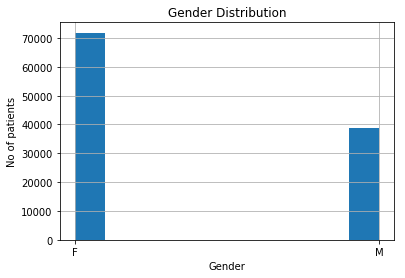

In [40]:
df.gender.hist();
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('No of patients')

Females patients are much more than males.

Now lets see if gender has relationship with show/no_show

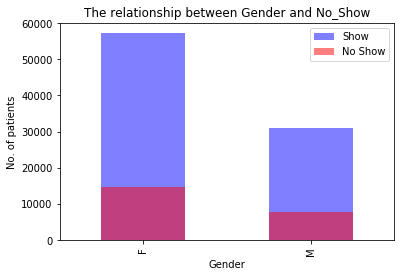

In [41]:
# drawing a bar plot to view the relationship between variables
df.gender[Show].value_counts().plot(kind= 'bar', alpha= 0.5, color= 'blue', label= 'Show')
df.gender[NoShow].value_counts().plot(kind= 'bar', alpha= 0.5, color= 'red', label= 'No Show')
plt.legend()
plt.title('The relationship between Gender and No_Show')
plt.xlabel('Gender')
plt.ylabel('No. of patients');

Although females patients are more than male patients , 
almost the same proportion of both do not show up ! 

### Research Question 2  (does Age has effect on show/no_show ???)

Lets see the distribution of Ages :

Text(0,0.5,'No. of patients')

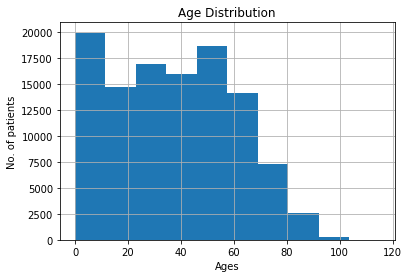

In [42]:
df.age.hist();
plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('No. of patients')

* I can see here that the highest number of patients are 
- from age 0 to 10 
- next from 50 to 60 
* The lowest number for patients starts from 80 
* I guess old people do not like to take appointments 

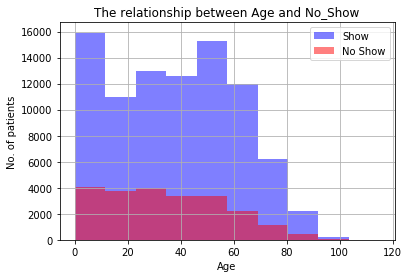

In [43]:
#drawing histogram to figure the effect of age on no show.
#plt.figure(figsize= [14.70, 8.27])
df.age[Show].hist(alpha= 0.5, color= 'blue', label= 'Show')
df.age[NoShow].hist(alpha= 0.5, color= 'red', label= 'No Show')
plt.legend()
plt.title('The relationship between Age and No_Show')
plt.xlabel('Age')
plt.ylabel('No. of patients');

I can see that patients from age 0 to 10 and from 45 to 58 are most likely to show up .
* while a big portion of the patients from age 10 to 20 do not show up 

###  Research question 3 : does having schorlarship affects show/no_show ???
First lets examine the distribution :

Text(0,0.5,'No, of Patients')

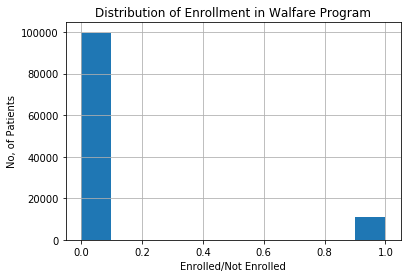

In [44]:
df.scholarship.hist();
plt.title('Distribution of Enrollment in Walfare Program')
plt.xlabel('Enrolled/Not Enrolled')
plt.ylabel('No, of Patients')

Few people are enrolled in the brazilian welfare program !!!

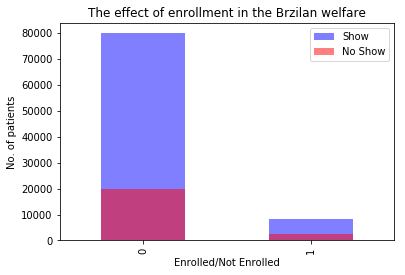

In [45]:
# drawing a bar plot to view the relationship between variables
df.scholarship[Show].value_counts().plot(kind= 'bar', alpha= 0.5, color= 'blue', label= 'Show')
df.scholarship[NoShow].value_counts().plot(kind= 'bar', alpha= 0.5, color= 'red', label= 'No Show')
plt.legend()
plt.title('The effect of enrollment in the Brzilan welfare')
plt.xlabel('Enrolled/Not Enrolled')
plt.ylabel('No. of patients');

almost same proportion. 

<a id='conclusions'></a>
## Conclusions

* Patients from Age 0 to 10 and from 45 to 58 are most likely to show up .
* while a big portion of the patients from age 10 to 20 do not show up

### Limitations
* Couldn't find siginificant effect for gender or scholarship. 

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0